In [1]:
import numpy as np # library for data structures, vectors, matrices and mathematical functions
import matplotlib.pyplot as plt                   # library for plotting and visual representation
import matplotlib.transforms as transform                   # library for plotting and visual representation
from matplotlib import rcParams                   # module handling generic plot parameters
from matplotlib.ticker import (FormatStrFormatter)# module for figure axis formatting
import pandas as pd                               # data administration, here used for data import
from scipy.optimize import curve_fit              # fitting algorithm from the scipy package
from IPython.display import display as dy, Markdown as md, Latex as Lx, Image as Im, HTML as hm # displaying LaTeX code in code cells

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 15,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',
                     'figure.figsize': (10,6),
                    })

plt.rcParams['axes.facecolor'] = 'black' 
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['xtick.labelcolor'] = 'white'
plt.rcParams['ytick.labelcolor'] = 'white'
plt.rcParams['legend.labelcolor'] = 'white'
plt.rcParams['grid.color'] = '#707070'
plt.rcParams['axes.titlepad'] = 20
legendfontsize=12

ip = get_ipython()
ibe = ip.configurables[-1]
ibe.figure_formats = { 'pdf', 'png'}

# Fringes of Equal Thickness

Group #13

NG Kuok Fung | #3797903 

Edgar Harutyunyan | #3775171

**Overview of Tasks**

***Task 1***

Determine the radius ($R$) of a convex lens by measuring Newton´s rings using light of a given wavelength.

***Task 2***

Determine the thickness of a metal foil using the interference at wedge-shaped layers.

***Task 3***

Determine the thickness or the diameter of an object chosen by yourself, e.g. a strand of hair.

In [2]:
# GLOBALS
Lambda = 546*1e-6 # mm

## Task 1

### Measurements of Newton rings

***Task Definition*** 

The goal of task 1 is to measure the radius ($r_k$) of the k-th Newton ring. Subsequently, the values of $(r_k^2$) are computed and plotted against ($k$) to determine the radius of curvature ($R$) of the convex lens.

***Procedure***

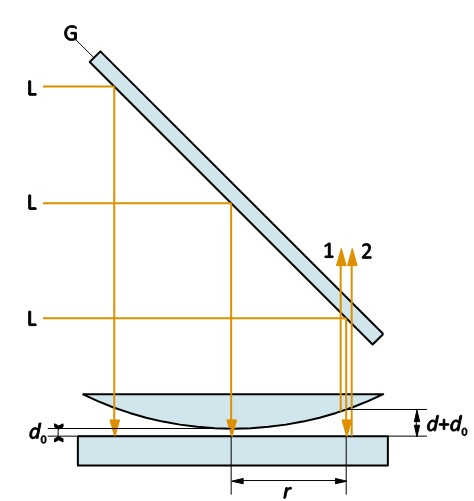

<IPython.core.display.Latex object>

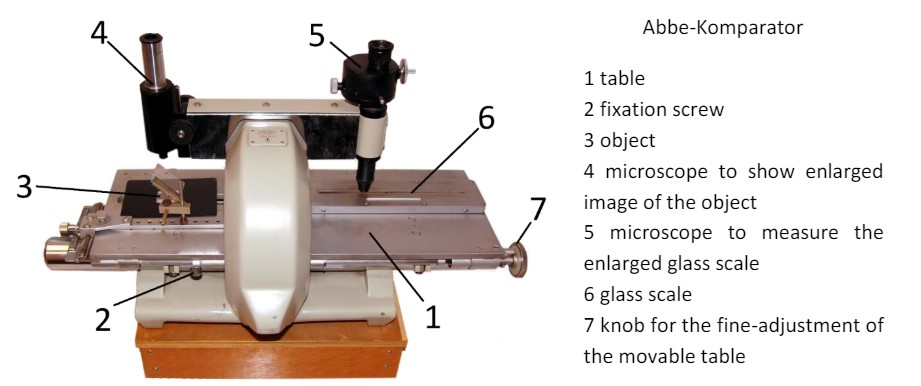

<IPython.core.display.Latex object>

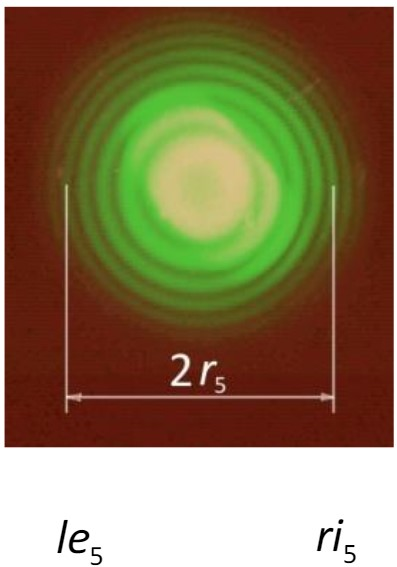

<IPython.core.display.Latex object>

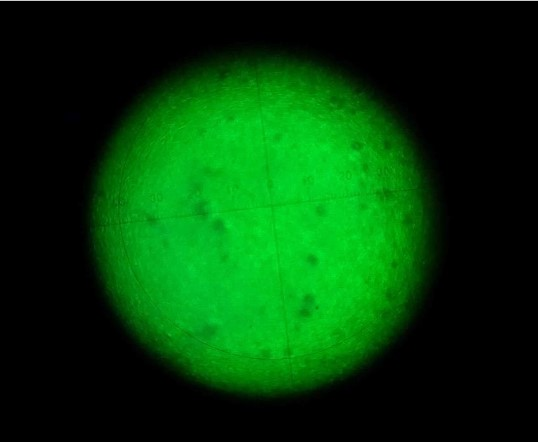

<IPython.core.display.Latex object>

In [3]:
dy(Im("./img/Lens.jpg", height=100, width=400))
dy(Lx(r'$Figure\, 1.1$: Lens [1]'))
dy(Im("./img/Abbe.jpg", height=100, width=800))
dy(Lx(r'$Figure\, 1.2$: Abbe Comparator [1]'))
dy(Im("./img/Ring.jpg", height=100, width=200))
dy(Lx(r'$Figure\, 1.3$: Ring [1]'))
dy(Im("./img/Cross.jpg", height=100, width=200))
dy(Lx(r'$Figure\, 1.4$: Pointer [1]'))

1. Place a clean convex lens onto a flat glass plate **Fig 1.1**. Insert it beneath the angled glass plate (G) of the Abbe comparator, depicted in **Fig 1.2** - Label 3.
<br>
2. During the experiment, Newton rings are formed  due to the path difference ($\Delta x$) between the interfering light rays **Fig 1.3**. 
<br>

3. In the Abbe comparator's left microscope, there is a small cross **Fig 1.4**. Align this cross with the outer edge of a dark ring using the knob. Subsequently, measure the table position using the right microscope.
<br>

4. Adjust the cross to an adjacent dark ring and repeat the measurement. 
<br>

5. If the measurement is to the right of the center of the Newton ring, it should be recorded as ($ri_k$). Conversely, if it is left of the center, it should be recorded as ($le_k$), where k represents the k-th dark ring.
<br>

6. Repeat this procedure for 10 dark rings, and measure both sides of each dark ring.
<br>

7. Calculate the radius ($r_k$) of each ring, and ($r_k^2$) using the formula: $r_k = | \text{le}_k - \text{ri}_k |$. 


In [4]:
column_names = ["$k$-th Dark Ring", "$le_k (mm)$ ", "$re_k (mm)$ ", "$r_k (mm)$", "$r_k^2(mm^2)$"]

Table1 = pd.read_csv('data/task1.csv', names=column_names)
Table1 = Table1.iloc[1:]

### Determine radius of curvature (R)
**Determine the thickness of a metal foil using the interference at wedge-shaped layers.**

***Theoretical Basis***: 

Two formulas were given for this experiment.

The first formula describes the optical path difference $\Delta x$ between the light rays:

$$ \Delta x = 2(d+d_o)+\frac{\lambda}{2} \label{eq1.1} \tag{1.1}$$

The second relates the radius of the k-th newton ring ($r_k$) to the radius of curvature ($R$):

$$ r_k ^2 = d(2R-d) \label{eq1.2} \tag{1.2}$$

- $d$ :  Ideal thickness due to the convex curvature

- $d_0$ : Contact distance between convex lens and glass plate

- $\lambda$ : Wavelength of light used in the experiment 

A relationship between $r_k$ and $R$ may be derived by imposing the condition for destructive interference: $\Delta x = (k+\frac{1}{2})\lambda$ 

Hence: $$ d= \frac{k\lambda}{4} - d_0 \label{eq1.3} \tag{1.3}$$

It is also assumed that $R \ll d_0$ 

Substituing [Eq.1.3](#mjx-eqn-eq1.3) into [Eq.1.2](#mjx-eqn-eq1.2) with this assumption yields: $$ r_k^2 = 2R \frac{k\lambda}{4} - d_0 \label{eq1.4} \tag{1.4}$$

Therefore: $$r_k^2 = \frac{R\lambda}{2}k - 2d_0R \label{eq5} \tag{1.5}$$

This implies that the gradient of a $r_k^2(k)$ graph ($\Delta := \frac{R\lambda}{2}$) can be used to compute $R$ with uncertainty of $\mu_R$ given by:

$$ \mu_R = \frac{\partial R}{\partial \Delta}\mu_{\Delta} = \frac{2}{\lambda}\mu_{\Delta},$$

- $\mu_{\Delta}$ : Uncertainty of the gradient from linear fit.

During this experiment, a green light from a mercury lamp was used.

$\lambda = 546 ~nm$

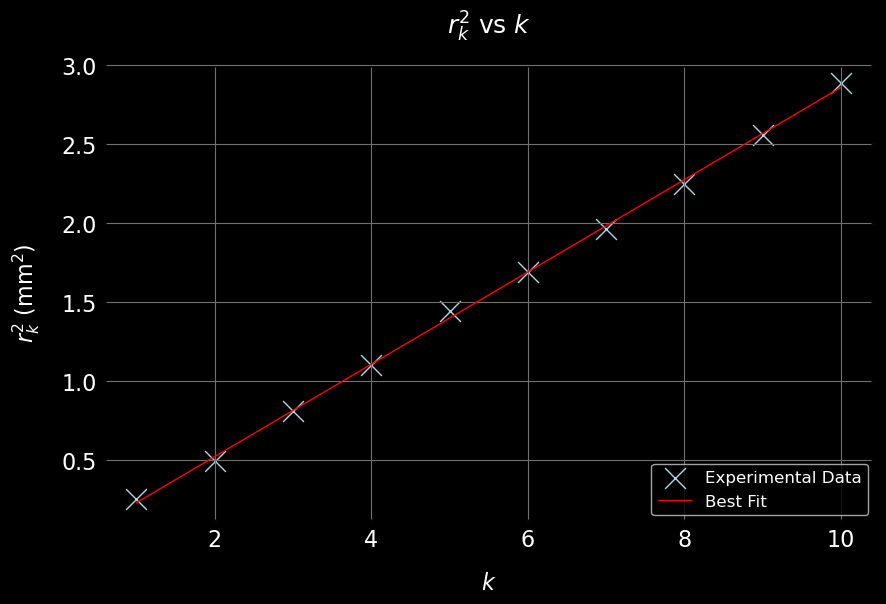

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [5]:
x_data = pd.to_numeric(Table1["$k$-th Dark Ring"], errors='coerce')
y_data = pd.to_numeric(Table1["$r_k^2(mm^2)$"], errors='coerce')

valid_indices = ~np.isnan(x_data) & ~np.isnan(y_data)
x_data = x_data[valid_indices]
y_data = y_data[valid_indices]

plt.scatter(x_data, y_data, label='Experimental Data', marker='x', color='#ADD8E6')

[fit_coeffs, V] = np.polyfit(x_data, y_data, 1, cov=True)
fit_line = np.polyval(fit_coeffs, x_data)

u_d= np.sqrt(V[0][0])
Delta = fit_coeffs[0]
R = 2*Delta/Lambda
u_r = 2*u_d/Lambda
plt.plot(x_data, fit_line, label='Best Fit', color='r')
plt.title('$r_k^2$ vs $k$')
plt.xlabel('$k$')
plt.ylabel('$r_k^2$ (mm$^2$)')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()
dy(Lx(r'$Figure\, 1.5$: Squared radius of fringes w.r.t their number.'))
dy(Lx(r'Gradient (Slope): $$\Delta = (%.2f \pm %.3f )~mm^2 $$' % (Delta,u_d)))
dy(Lx('$$R = (%.2f \pm %.3f )~m $$' % (R*1e-3,u_r*1e-3)))

## Task 2 

### Measuring positions ($x_k$)

***Task Definition*** 

Determine the thickness ($D$) of a metal foil by measuring the positions ($x_k$) of the k-th dark fringe formed by the interference pattern of light incident on the wedge-shaped layer.

***Theoretical Basis*** 

1. A wedge-shaped layer is an air gap between two parallel glass plates. Interference occurs in the wedge-shaped layer due to a gradual variation in the thickness between the glass layers. 
<br>

2. This effect may be achieved by placing a thin object (i.e: metal foil or strand of hair) at one edge of the plates **Fig 2.1**.
<br>

3. Monochromatic light perperndicularly incident on the plates is reflected, this causes a phase difference between the light rays which leads to an interference pattern which may be obeserved using the Abbe comparator. 
<br>

4. The frontal projection of the setup allows the for the derivation of a formula relating the the relation the thickness of an object $D$ and the position of the k-th dark fringe $x_k$.

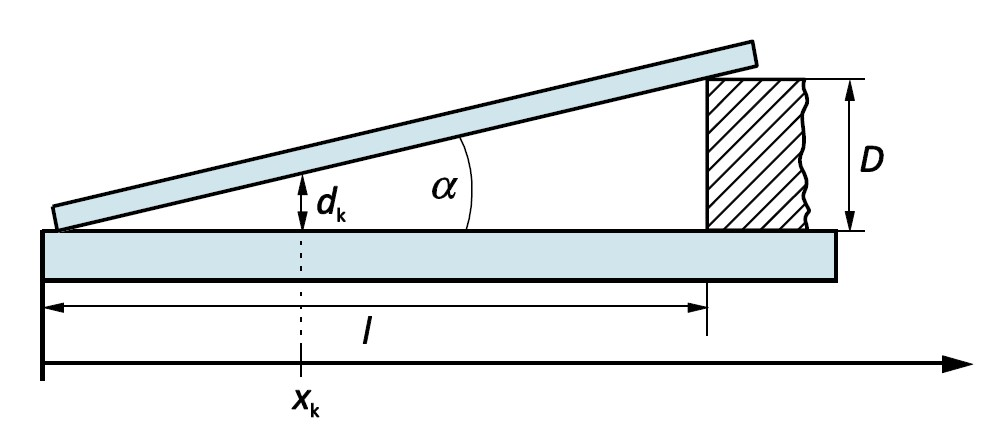

<IPython.core.display.Latex object>

In [6]:
dy(Im("./img/task_2_fig1.jpg"))
dy(Lx(r'$Figure\, 2.1$: Frontal projection of the wedge shaped layer. [1]'))

The following formula may be derived by analyzing the right angled triangle in **Fig 2.1**: 

$$\tan(\alpha) = \frac{D}{l} = \frac{d_k}{x_k}, \label{eq2.1} \tag{2.1}$$

The phase difference ($\delta$) for interference in wedge shaped layers was given as:

$$ \delta = \frac{2 \pi \Delta x}{\lambda} + \pi \label{eq2.2} \tag{2.2}$$

- $x_k$ = Position of k-th dark fringe

- $d_k$ = Plate seperation at the k-th dark fringe

- $D$ = Thickness of metal foil

- $\Delta x$ = Path difference

- $\delta$ = Phase difference

Substituting the condition for destructive interference $\delta= (2k+1) \pi$ with $\Delta x = 2 d_k$ into Eq.[2.2](#mjx-eqn-eq2.2)


$$\frac{4\pi d_k}{\lambda} + \pi = \pi(2k+1)$$

$$ 2d_k = k\lambda $$

$$d_k = \frac{k\lambda}{2} \label{eq2.3} \tag{2.3}$$

Substituting Eq.[2.3](#mjx-eqn-eq2.3) into Eq.[2.1](#mjx-eqn-eq2.1) provides the following relationship between $D$ and $x_k$

$$x_k = \frac{l\lambda}{2D}k \label{eq2.4} \tag{2.4}$$

where $x_k$ is the position of the fringe
$d_k$ is the half path length of the light: 

$\Delta x = 2d_k$ 
In the experiment the dark fringes have been measured. Thus from the destructive interference condition:

$$\frac{2\pi\Delta x}{\lambda} + \pi = \pi(2k+1)$$

$$\Delta x = k\lambda = 2d_k$$

$$d_k = \frac{k\lambda}{2}$$

Substituting the latter relation into the first angle ratio one ends up with:

$$x_k = \frac{l\lambda}{2D}k$$

***Procedure*** 

The Abbe comparator from task 1 is used to take measurements.

1) Place the wedge underneath the left microscope 
<br>

2) Allign the cross under the left microscope until it lines up with an arbitrary dark fringe. This is the 0th dark fringe (k=0). Measure this initial position $x_0$ using the scale under the right micrscope of the Abbe comparator.
<br>

3) All future measurements of $x_k$ are made with respect to the initial position $x_0$.
<br>

4) Move the cross to the adjacent dark fringe and repeat the measurement. Perform steps 1 to 4 at least 10 times.

### Determine thickness ($D$) of metail foil

***Theoretical Basis*** 

From Eq.[2.4](#mjx-eqn-eq2.4), $D$ is given by the gradient of an $x_k$ against $k$ graph:

$$D = \frac{l \lambda}{2\Delta}$$

- $\Delta$ : Slope of  $x_k$ against $k$ graph
- $l$ : Distance of metal foil from initial position $x_0$

During this experiment, a green light from a mercury lamp was used with wavelength ($\lambda = 546 nm$).

The uncertainty of $D$ is given by:

$$\mu_D = \sqrt{\left(\frac{\partial D}{\partial \Delta}\mu_\Delta\right)^2 + \left(\frac{\partial D}{\partial l}\mu_l\right)^2} = \sqrt{\left(\frac{l\lambda}{2\Delta^2}\mu_\Delta\right)^2 + \left(\frac{\lambda}{2\Delta}\mu_l\right)^2}$$

- $\mu_l=0.5mm$ : Uncertainity of Ruler
- $\mu_\Delta$ : Uncertainty of Linear fit

In [7]:
df2 = pd.read_csv('./data/task2.csv', dtype=np.float64)
L = np.array(df2['L (mm)'][0])
u_l = 0.5 # mm
k_l = np.array(df2['K'], dtype=np.int32)
X_l = np.array(df2['X_k (mm)'])

In [8]:
def X_dark(k, delta, b):
    return k*delta + b

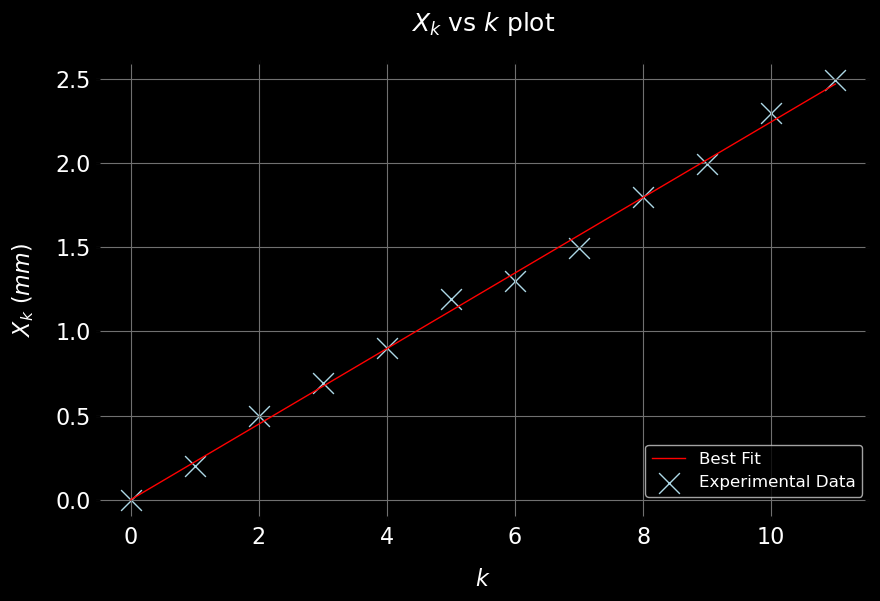

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [9]:
x = np.abs(X_l-X_l[0])
fit = curve_fit(X_dark, k_l, x, (0.5,0));
Delta = fit[0][0]
uDelta = np.sqrt(fit[1][0][0])
D = L*Lambda/2/Delta
uD = np.sqrt((uDelta*L*Lambda/2/Delta/Delta)**2 + (u_l*Lambda/2/Delta)**2)
k_fit = np.linspace(k_l[0],k_l[-1],100)
x_fit = X_dark(k_fit,Delta,0)
fig1,ax1 = plt.subplots()
#fig1.set_figheight(height_inch)
#fig1.set_figwidth(width_inch)
ax1.set_xlabel('$k$')
ax1.set_ylabel('$X_k ~ \it(mm)$')
ax1.grid('both')
#ax1.axhline(0, linewidth=0.5, color='black')
plt.title("$X_k$ vs $k$ plot")
plt.plot(k_fit,x_fit, label="Best Fit", color='r')
plt.scatter(k_l, x, label="Experimental Data", color='#ADD8E6', marker='x')
    
fig1.legend(bbox_to_anchor = (0.90, 0.25), fontsize = legendfontsize)
plt.show()
dy(Lx(r'$Figure\, 2$: Position of fringes with respect to their number.'))
dy(Lx(r'$$l = (%.2f \pm %.2f)~mm$$'% (L,u_l)))
dy(Lx(r'The film thickness: $$D = (%.2f \pm %.3f )~\mu m$$'% (D*1e3,uD*1e3)))

## Task 3

***Task Definition*** 

The goal is to measure the thickness ($D$) of a strand of hair. The procedure and theoretical basis used in this task is identical to task 2.

For this experiment, the strand of hair was provided by NG Kuok Fung.

In [10]:
df3 = pd.read_csv('./data/task3.csv', dtype=np.float64)
L = np.array(df3['L (mm)'][0])
u_l = 0.5 # mm
k_l = np.array(df3['K'], dtype=np.int32)
X_l = np.array(df3['X_k (mm)'])

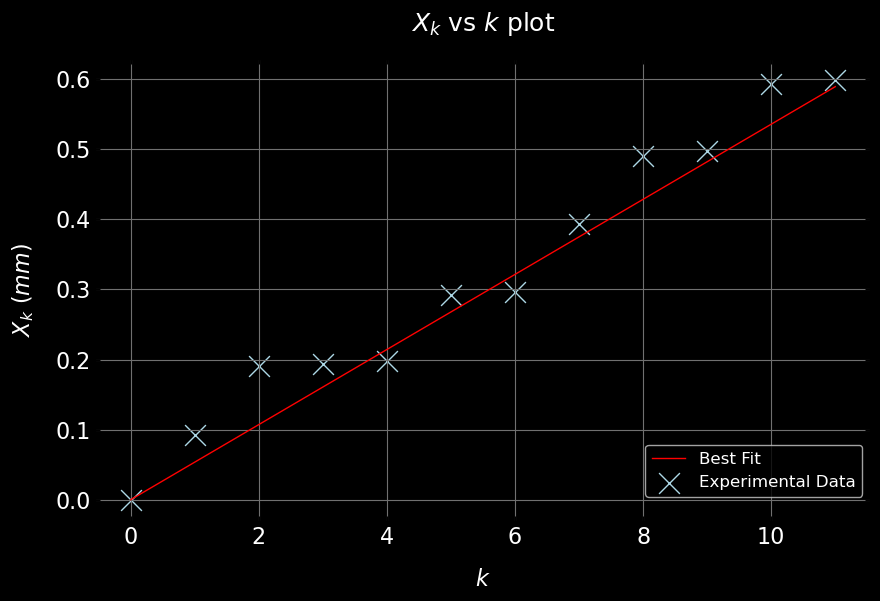

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [11]:
x = np.abs(X_l-X_l[0])
fit = curve_fit(X_dark, k_l, x, (0.5,0));
Delta = fit[0][0]
uDelta = np.sqrt(fit[1][0][0])
D = L*Lambda/2/Delta
#uD = uDelta*L*Lambda/2/Delta/Delta
uD = np.sqrt((uDelta*L*Lambda/2/Delta/Delta)**2 + (u_l*Lambda/2/Delta)**2)
k_fit = np.linspace(k_l[0],k_l[-1],100)
x_fit = X_dark(k_fit,Delta,0)
fig1,ax1 = plt.subplots()
#fig1.set_figheight(height_inch)
#fig1.set_figwidth(width_inch)
ax1.set_xlabel('$k$')
ax1.set_ylabel('$X_k ~ \it(mm)$')
ax1.grid('both')
#ax1.axhline(0, linewidth=0.5, color='black')
plt.title("$X_k$ vs $k$ plot")
plt.plot(k_fit,x_fit, label="Best Fit", color='r')
plt.scatter(k_l, x, label="Experimental Data", color='#ADD8E6', marker='x')
    
fig1.legend(bbox_to_anchor = (0.90, 0.25), fontsize = legendfontsize)
plt.show()
dy(Lx(r'$Figure\, 3$: Position of fringes with respect to their number.'))
dy(Lx(r'The hair thickness: $$D = (%.2f \pm %.3f )~\mu m$$'% (D*1e3,uD*1e3)))

The uncertainity is relatively large due to difficulties with accurately allinging the microscope to the dark fringes. However, the value of $D$ found is within an expected range of 80 to 120 micrmeters. [[2]](https://e-ajbc.org/journal/view.php?doi=10.20402/ajbc.2023.0001)

## References

1) [O09e Lab instruction](https://moodle2.uni-leipzig.de/pluginfile.php/3621571/mod_resource/content/1/O09e_2024.pdf)
2) **Research Progress in Composition, Classification and Influencing Factors of Hair** : Asian J Beauty Cosmetol. 2023;21 (3): 503-516. Publication Date (Web): 2023 September 26 (Review Article) doi:https://doi.org/10.20402/ajbc.2023.0001